## Import Libraries.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from keras.utils import np_utils
import seaborn as sns
from skimage import color
from skimage import io
import h5py
import tensorflow as tf
from tensorflow.keras.layers import Activation
from keras import optimizers
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)


Using TensorFlow backend.


## Load data.

In [2]:
df = h5py.File('C:\\Users\\HP\\Downloads\\SVHN_single_grey1 (1).h5', 'r')

## Dataset attributes.

In [3]:
df.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [4]:
X_train=df['X_train']
X_test=df['X_test']
X_val=df['X_val']
y_train=df['y_train']
y_test=df['y_test']
y_val=df['y_val']

## Dataset distribution and datatype.

In [5]:
print("Training data X Shape :", X_train.shape,"and data Type : ", X_train.dtype)
print("Testing data X Shape :", X_test.shape,"and data Type : ", X_test.dtype)
print("Validation data X Shape :", X_val.shape,"and data Type : ", X_val.dtype)
print("Training data y Shape :", y_train.shape,"and data Type : ", y_train.dtype)
print("Testing data y Shape :", y_test.shape,"and data Type : ", y_test.dtype)
print("Validation data y Shape :", y_val.shape,"and data Type : ", y_val.dtype)

Training data X Shape : (42000, 32, 32) and data Type :  float32
Testing data X Shape : (18000, 32, 32) and data Type :  float32
Validation data X Shape : (60000, 32, 32) and data Type :  float32
Training data y Shape : (42000,) and data Type :  uint8
Testing data y Shape : (18000,) and data Type :  uint8
Validation data y Shape : (60000,) and data Type :  uint8


## Visualisation..

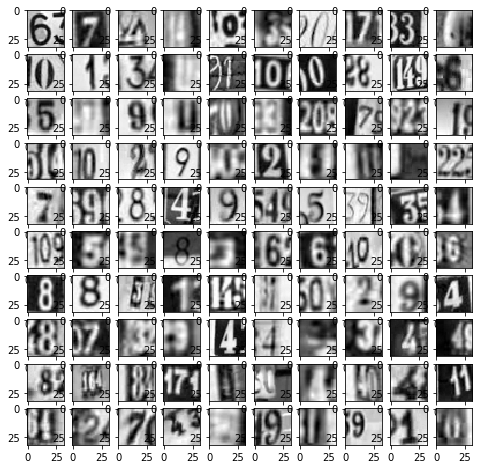

In [6]:
fig=plt.figure(figsize=(8,8))
columns=10
rows=10
for i in range(1, columns*rows+1):
    img= X_train[i]
    fig.add_subplot(rows,columns,i)
    plt.imshow(img,cmap='gray')
plt.show()

## Visualising first 10 elements..

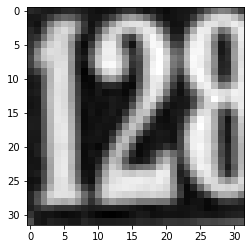

Label:  2


In [7]:
plt.imshow(X_train[0],cmap='gray')    
plt.show()
print('Label: ', y_train[0])

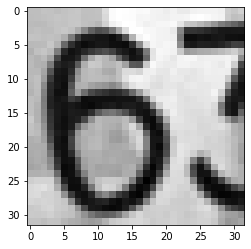

Label:  6


In [8]:
plt.imshow(X_train[1],cmap='gray')    
plt.show()
print('Label: ', y_train[1])

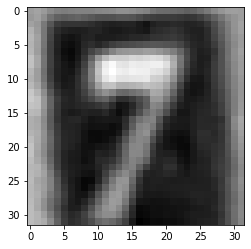

Label:  7


In [9]:
plt.imshow(X_train[2],cmap='gray')    
plt.show()
print('Label: ', y_train[2])

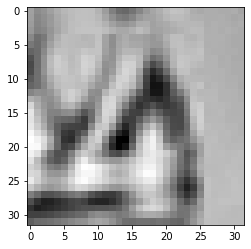

Label:  4


In [10]:
plt.imshow(X_train[3],cmap='gray')    
plt.show()
print('Label: ', y_train[3])

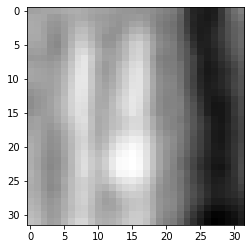

Label:  4


In [11]:
plt.imshow(X_train[4],cmap='gray')    
plt.show()
print('Label: ', y_train[4])

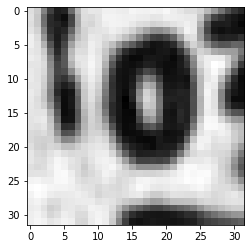

Label:  0


In [12]:
plt.imshow(X_train[5],cmap='gray')    
plt.show()
print('Label: ', y_train[5])

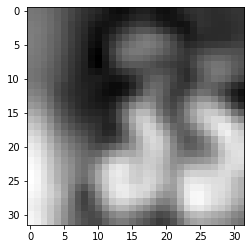

Label:  3


In [13]:
plt.imshow(X_train[6],cmap='gray')    
plt.show()
print('Label: ', y_train[6])

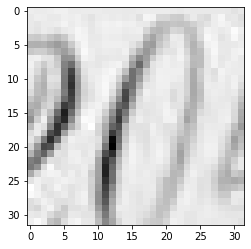

Label:  0


In [14]:
plt.imshow(X_train[7],cmap='gray')    
plt.show()
print('Label: ', y_train[7])

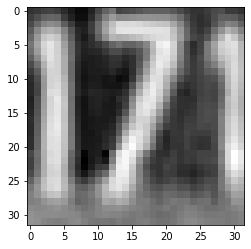

Label:  7


In [15]:
plt.imshow(X_train[8],cmap='gray')    
plt.show()
print('Label: ', y_train[8])

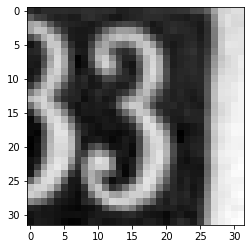

Label:  3


In [16]:
plt.imshow(X_train[9],cmap='gray')    
plt.show()
print('Label: ', y_train[9])

## Preprocessing the data.

### Reshaping the input data.

In [17]:
X_train = np.asarray(X_train).reshape(42000,1024)

X_test = np.asarray(X_test).reshape(18000,1024)

X_val = np.asarray(X_val).reshape(60000,1024)

### Normalizing the data.

In [18]:
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)
X_val = preprocessing.normalize(X_val)

### Converting output data into one hot vectors.

In [19]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)

y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)

### Shape of the data.

In [20]:
print(X_train.shape, X_test.shape,X_val.shape, y_train.shape, y_test.shape,y_val.shape)

(42000, 1024) (18000, 1024) (60000, 1024) (42000, 10) (18000, 10) (60000, 10)


## Basic NN model.

In [21]:
M1 = Sequential()

In [22]:
M1.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
M1.add(Activation('relu'))

M1.add(Dense(256, kernel_initializer='he_normal'))
M1.add(Activation('relu'))

M1.add(Dense(128, kernel_initializer='he_normal'))
M1.add(Activation('relu'))

M1.add(Dense(64, kernel_initializer='he_normal'))
M1.add(Activation('relu'))

M1.add(Dense(32, kernel_initializer='he_normal'))
M1.add(Activation('relu'))

M1.add(Dense(10))
M1.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [23]:
M1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
__________

### Implementing optimizer [SGD].

In [24]:
M1.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [25]:
history = M1.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
42000/42000 [==============================] - 10s 242us/sample - loss: 2.3019 - acc: 0.1064 - val_loss: 2.3008 - val_acc: 0.1205
Epoch 2/10
42000/42000 [==============================] - 10s 230us/sample - loss: 2.3002 - acc: 0.1241 - val_loss: 2.2996 - val_acc: 0.1416oss: 2.3003 - ETA: 0s - loss: 2.3003 - acc: 0.1
Epoch 3/10
42000/42000 [==============================] - 10s 242us/sample - loss: 2.2992 - acc: 0.1337 - val_loss: 2.2986 - val_acc: 0.1521
Epoch 4/10
42000/42000 [==============================] - 10s 239us/sample - loss: 2.2983 - acc: 0.1512 - val_loss: 2.2977 - val_acc: 0.1576
Epoch 5/10
42000/42000 [==============================] - 10s 228us/sample - loss: 2.2974 - acc: 0.1610 - val_loss: 2.2969 - val_acc: 0.1353
Epoch 6/10
42000/42000 [==============================] - 10s 230us/sample - loss: 2.2965 - acc: 0.1632 - val_loss: 2.2960 - val_acc: 0.1770
Epoch 7/1

### Model evaluation.

In [26]:
R1 = M1.evaluate(X_val, y_val)
print('Validation accuracy using SGD optimizer : ', R1[1])

60000/60000 [==============================] - 9s 146us/sample - loss: 2.2920 - acc: 0.2035
Validation accuracy using SGD optimizer :  0.20353334


### Model performance with SGD optimizer is low with accuracy of 20%.

### Implementing optimizer [ADAM]. 

In [27]:
M1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [28]:
history = M1.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 13s 303us/sample - loss: 2.1909 - acc: 0.1628 - val_loss: 1.9096 - val_acc: 0.2825
Epoch 2/10
42000/42000 [==============================] - 12s 283us/sample - loss: 1.6812 - acc: 0.3854 - val_loss: 1.5491 - val_acc: 0.4336
Epoch 3/10
42000/42000 [==============================] - 12s 283us/sample - loss: 1.5083 - acc: 0.4608 - val_loss: 1.5071 - val_acc: 0.4681
Epoch 4/10
42000/42000 [==============================] - 12s 290us/sample - loss: 1.3361 - acc: 0.5452 - val_loss: 1.2210 - val_acc: 0.5901
Epoch 5/10
42000/42000 [==============================] - 12s 282us/sample - loss: 1.2186 - acc: 0.5936 - val_loss: 1.1507 - val_acc: 0.6189
Epoch 6/10
42000/42000 [==============================] - 12s 284us/sample - loss: 1.1235 - acc: 0.6309 - val_loss: 1.0809 - val_acc: 0.6467
Epoch 7/10
42000/42000 [==============================] - 12s 284us/sample - loss: 1.0637 - acc: 0.6519 

In [29]:
R2 = M1.evaluate(X_val, y_val)
print('Validation accuracy using adam: ', R2[1])

60000/60000 [==============================] - 9s 151us/sample - loss: 0.8645 - acc: 0.7273
Validation accuracy using adam:  0.7273167


### Model performance with Adam optimizer increases to 72%.

###  Implementing optimizer [SGD] with learning rate 0.0001.

In [30]:
sgd = optimizers.SGD(lr = 0.0001)
    
M1.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = M1.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 10s 248us/sample - loss: 0.8101 - acc: 0.7447 - val_loss: 0.8193 - val_acc: 0.7423
Epoch 2/10
42000/42000 [==============================] - 10s 248us/sample - loss: 0.8024 - acc: 0.7475 - val_loss: 0.8095 - val_acc: 0.74640.8058 -  - ETA: 0s - loss: 0.8039 - acc: 0
Epoch 3/10
42000/42000 [==============================] - 10s 239us/sample - loss: 0.7978 - acc: 0.7500 - val_loss: 0.8078 - val_acc: 0.7481
Epoch 4/10
42000/42000 [==============================] - 10s 243us/sample - loss: 0.7943 - acc: 0.7500 - val_loss: 0.8062 - val_acc: 0.7462
Epoch 5/10
42000/42000 [==============================] - 10s 234us/sample - loss: 0.7918 - acc: 0.7520 - val_loss: 0.8050 - val_acc: 0.7478
Epoch 6/10
42000/42000 [==============================] - 10s 236us/sample - loss: 0.7891 - acc: 0.7519 - val_loss: 0.8042 - val_acc: 0.7476
Epoch 7/10
42000/42000 [==============================] - 10s

In [31]:
R3 = M1.evaluate(X_val, y_val)
print('Validation accuracy using sgd with lr: ', R3[1])

60000/60000 [==============================] - 9s 153us/sample - loss: 0.7885 - acc: 0.7532
Validation accuracy using sgd with lr:  0.7531667


### Adding the learning rate parameter [SGD optimizer] , our model performance increases from TO 20% FROM 75%.

### Implementing optimizer [Adam] with learning rate 0.0001.

In [32]:
adam = optimizers.adam(lr = 0.0001)

M1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = M1.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 13s 305us/sample - loss: 0.8525 - acc: 0.7280 - val_loss: 0.8170 - val_acc: 0.7417
Epoch 2/10
42000/42000 [==============================] - 12s 281us/sample - loss: 0.8197 - acc: 0.7393 - val_loss: 0.8036 - val_acc: 0.7427
Epoch 3/10
42000/42000 [==============================] - 12s 281us/sample - loss: 0.7912 - acc: 0.7484 - val_loss: 0.8304 - val_acc: 0.7367
Epoch 4/10
42000/42000 [==============================] - 12s 284us/sample - loss: 0.7588 - acc: 0.7585 - val_loss: 0.7613 - val_acc: 0.7577
Epoch 5/10
42000/42000 [==============================] - 13s 300us/sample - loss: 0.7403 - acc: 0.7646 - val_loss: 0.7306 - val_acc: 0.7693
Epoch 6/10
42000/42000 [==============================] - 12s 291us/sample - loss: 0.7148 - acc: 0.7745 - val_loss: 0.6880 - val_acc: 0.7853
Epoch 7/10
42000/42000 [==============================] - 12s 292us/sample - loss: 0.6913 - acc: 0.7805 

In [33]:
R4 = M1.evaluate(X_val, y_val)
print('Validation accuracy using adam with lr: ', R4[1])

60000/60000 [==============================] - 9s 153us/sample - loss: 0.6665 - acc: 0.7877
Validation accuracy using adam with lr:  0.7876833


###  Adding the learning rate parameter [Adam optimizer] , our model performance increases from TO 72% FROM 78%.

In [34]:
results_on_val = pd.DataFrame({'Method':['NN'], 'accuracy': R4[1]},index={'1'})
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.787683


### From the above model the best model is Adam optimizer with learning rate 0.0001 model with accuracy 69%.

## Implementing Batch Normalization.

### (1) With optimizer [Adam].

In [35]:
M2 = Sequential()

In [36]:
M2.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
M2.add(BatchNormalization())
M2.add(Activation('relu'))

M2.add(Dense(256, kernel_initializer='he_normal'))
M2.add(BatchNormalization())
M2.add(Activation('relu'))

M2.add(Dense(128, kernel_initializer='he_normal'))
M2.add(BatchNormalization())
M2.add(Activation('relu'))

M2.add(Dense(64, kernel_initializer='he_normal'))
M2.add(BatchNormalization())
M2.add(Activation('relu'))

M2.add(Dense(32, kernel_initializer='he_normal'))
M2.add(BatchNormalization())
M2.add(Activation('relu'))

M2.add(Dense(10))
M2.add(Activation('softmax'))

In [37]:
M2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_v1 (Batc (None, 512)               2048      
_________________________________________________________________
activation_6 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 256)               1024      
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
__________

In [38]:
adam = optimizers.adam(lr = 0.0001)

M2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [39]:
history_1 = M2.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 16s 390us/sample - loss: 1.2183 - acc: 0.6152 - val_loss: 1.8442 - val_acc: 0.3552
Epoch 2/10
42000/42000 [==============================] - 14s 342us/sample - loss: 0.6830 - acc: 0.7893 - val_loss: 0.9587 - val_acc: 0.7035
Epoch 3/10
42000/42000 [==============================] - 14s 345us/sample - loss: 0.5484 - acc: 0.8285 - val_loss: 0.7387 - val_acc: 0.7639
Epoch 4/10
42000/42000 [==============================] - 15s 346us/sample - loss: 0.4612 - acc: 0.8555 - val_loss: 0.7813 - val_acc: 0.7418
Epoch 5/10
42000/42000 [==============================] - 14s 342us/sample - loss: 0.4048 - acc: 0.8727 - val_loss: 0.8123 - val_acc: 0.7365
Epoch 6/10
42000/42000 [==============================] - 14s 341us/sample - loss: 0.3611 - acc: 0.8875 - val_loss: 0.5983 - val_acc: 0.8140
Epoch 7/10
42000/42000 [==============================] - 14s 343us/sample - loss: 0.3210 - acc: 0.8988 

In [40]:
results_1 =M2.evaluate(X_val, y_val)
print('Val_acc using batch adam : ', results_1[1])

60000/60000 [==============================] - 11s 191us/sample - loss: 0.5943 - acc: 0.8246
Val_acc using batch adam :  0.82463336


In [41]:
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_adam'], 'accuracy': [results_1[1]]},index={'2'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.787683
2,NN_Batch_adam,0.824633


###   Adding the Batch normalization [Adam optimizer] , our model performance increases from TO 78% FROM 82%.

### (2) With optimizer [SGD].

In [42]:
M3 = Sequential()

In [43]:
M3.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
M3.add(BatchNormalization())
M3.add(Activation('relu'))

M3.add(Dense(256, kernel_initializer='he_normal'))
M3.add(BatchNormalization())
M3.add(Activation('relu'))

M3.add(Dense(128, kernel_initializer='he_normal'))
M3.add(BatchNormalization())
M3.add(Activation('relu'))

M3.add(Dense(64, kernel_initializer='he_normal'))
M3.add(BatchNormalization())
M3.add(Activation('relu'))

M3.add(Dense(32, kernel_initializer='he_normal'))
M3.add(BatchNormalization())
M3.add(Activation('relu'))

M3.add(Dense(10))
M3.add(Activation('softmax'))

In [44]:
M3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_v1_5 (Ba (None, 512)               2048      
_________________________________________________________________
activation_12 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_v1_6 (Ba (None, 256)               1024      
_________________________________________________________________
activation_13 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
__________

In [45]:
sgd = optimizers.sgd(lr = 0.0001)

M3.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [46]:
history_2 = M3.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 15s 348us/sample - loss: 2.2219 - acc: 0.2112 - val_loss: 2.3244 - val_acc: 0.1047
Epoch 2/10
42000/42000 [==============================] - 13s 309us/sample - loss: 1.8235 - acc: 0.4101 - val_loss: 2.1272 - val_acc: 0.2931
Epoch 3/10
42000/42000 [==============================] - 12s 297us/sample - loss: 1.5519 - acc: 0.5311 - val_loss: 1.5404 - val_acc: 0.5613
Epoch 4/10
42000/42000 [==============================] - 13s 304us/sample - loss: 1.3343 - acc: 0.6124 - val_loss: 1.2262 - val_acc: 0.6467
Epoch 5/10
42000/42000 [==============================] - 13s 311us/sample - loss: 1.1641 - acc: 0.6635 - val_loss: 1.0714 - val_acc: 0.6897
Epoch 6/10
42000/42000 [==============================] - 13s 305us/sample - loss: 1.0308 - acc: 0.7005 - val_loss: 0.9671 - val_acc: 0.7163
Epoch 7/10
42000/42000 [==============================] - 14s 325us/sample - loss: 0.9285 - acc: 0.7288 

In [47]:
results_2 = M3.evaluate(X_val, y_val)
print('Val_acc using BatchNorm sgd : ', results_2[1])

60000/60000 [==============================] - 12s 193us/sample - loss: 0.7204 - acc: 0.7863
Val_acc using BatchNorm sgd :  0.7863167


In [48]:
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_sgd'], 'accuracy': [results_2[1]]},index={'3'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.787683
2,NN_Batch_adam,0.824633
3,NN_Batch_sgd,0.786317


### Adding the Batch normalization [SGD optimizer] , our model performance increases from TO 75% FROM 78%.

## Implementing Dropout Regularization [Lambda=0.2].

In [49]:
M4 = Sequential()

In [50]:
M4.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
M4.add(BatchNormalization())
M4.add(Activation('relu'))
M4.add(Dropout(0.2))

M4.add(Dense(256,kernel_initializer='he_normal'))
M4.add(BatchNormalization())
M4.add(Activation('relu'))
M4.add(Dropout(0.2))

M4.add(Dense(128, kernel_initializer='he_normal'))
M4.add(BatchNormalization())
M4.add(Activation('relu'))
M4.add(Dropout(0.2))

M4.add(Dense(64, kernel_initializer='he_normal'))
M4.add(BatchNormalization())
M4.add(Activation('relu'))
M4.add(Dropout(0.2))

M4.add(Dense(32, kernel_initializer='he_normal'))
M4.add(BatchNormalization())
M4.add(Activation('relu'))
M4.add(Dropout(0.2))

M4.add(Dense(10))
M4.add(Activation('softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [51]:
M4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_v1_10 (B (None, 512)               2048      
_________________________________________________________________
activation_18 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_v1_11 (B (None, 256)               1024      
_________________________________________________________________
activation_19 (Activation)   (None, 256)               0         
__________

### (1) With optimizer [ SGD ].

In [52]:
sgd= optimizers.sgd(lr = 0.0001)

M4.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [53]:
history_3 = M4.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 17s 395us/sample - loss: 2.4995 - acc: 0.1153 - val_loss: 2.3044 - val_acc: 0.1013
Epoch 2/10
42000/42000 [==============================] - 14s 344us/sample - loss: 2.3333 - acc: 0.1444 - val_loss: 2.2636 - val_acc: 0.1469
Epoch 3/10
42000/42000 [==============================] - 14s 338us/sample - loss: 2.2310 - acc: 0.1807 - val_loss: 2.0844 - val_acc: 0.3107
Epoch 4/10
42000/42000 [==============================] - 14s 337us/sample - loss: 2.1357 - acc: 0.2250 - val_loss: 1.9037 - val_acc: 0.4206
Epoch 5/10
42000/42000 [==============================] - 14s 342us/sample - loss: 2.0498 - acc: 0.2609 - val_loss: 1.7767 - val_acc: 0.4697
Epoch 6/10
42000/42000 [==============================] - 15s 356us/sample - loss: 1.9571 - acc: 0.3029 - val_loss: 1.6659 - val_acc: 0.5014
Epoch 7/10
42000/42000 [==============================] - 15s 358us/sample - loss: 1.8672 - acc: 0.3362 

In [54]:
results_3 = M4.evaluate(X_val, y_val)
print('Val_acc using BatchNorm and Dropout sgd : ', results_3[1])

60000/60000 [==============================] - 12s 207us/sample - loss: 1.3510 - acc: 0.6018
Val_acc using BatchNorm and Dropout sgd :  0.60178334


In [55]:
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_Drop_sgd'], 'accuracy': [results_3[1]]},index={'4'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.787683
2,NN_Batch_adam,0.824633
3,NN_Batch_sgd,0.786317
4,NN_Batch_Drop_sgd,0.601783


### Adding the Dropout with 0.2 [SGD optimizer] , our model performance is 60%.

### (2) With optimizer [ Adam].

In [56]:
adam= optimizers.adam(lr = 0.0001)

M4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [57]:
history_3 = M4.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 19s 454us/sample - loss: 1.3586 - acc: 0.5462 - val_loss: 1.2942 - val_acc: 0.5875
Epoch 2/10
42000/42000 [==============================] - 17s 395us/sample - loss: 0.9989 - acc: 0.6896 - val_loss: 1.5057 - val_acc: 0.5517
Epoch 3/10
42000/42000 [==============================] - 16s 391us/sample - loss: 0.8566 - acc: 0.7387 - val_loss: 1.1530 - val_acc: 0.6405
Epoch 4/10
42000/42000 [==============================] - 16s 392us/sample - loss: 0.7743 - acc: 0.7668 - val_loss: 0.7906 - val_acc: 0.7454
Epoch 5/10
42000/42000 [==============================] - 16s 392us/sample - loss: 0.6976 - acc: 0.7902 - val_loss: 0.9044 - val_acc: 0.7115
Epoch 6/10
42000/42000 [==============================] - 17s 393us/sample - loss: 0.6554 - acc: 0.8013 - val_loss: 1.0186 - val_acc: 0.7027
Epoch 7/10
42000/42000 [==============================] - 16s 393us/sample - loss: 0.6209 - acc: 0.8171 

In [58]:
results_4 = M4.evaluate(X_val, y_val)
print('Val_acc using BatchNorm and Dropout adam : ', results_4[1])

60000/60000 [==============================] - 14s 228us/sample - loss: 0.5855 - acc: 0.8165
Val_acc using BatchNorm and Dropout adam :  0.8164833


In [59]:
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_Drop_adam'], 'accuracy': [results_4[1]]},index={'5'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.787683
2,NN_Batch_adam,0.824633
3,NN_Batch_sgd,0.786317
4,NN_Batch_Drop_sgd,0.601783
5,NN_Batch_Drop_adam,0.816483


### Adding the Dropout with 0.2 [Adam optimizer] , our model performance is 81%.

## Implementing Dropout Regularization [Lambda=0.5].

In [60]:
M5 = Sequential()

In [61]:
M5.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
M5.add(BatchNormalization())
M5.add(Activation('relu'))
M5.add(Dropout(0.5))

M5.add(Dense(256,kernel_initializer='he_normal'))
M5.add(BatchNormalization())
M5.add(Activation('relu'))
M5.add(Dropout(0.5))

M5.add(Dense(128, kernel_initializer='he_normal'))
M5.add(BatchNormalization())
M5.add(Activation('relu'))
M5.add(Dropout(0.5))

M5.add(Dense(64, kernel_initializer='he_normal'))
M5.add(BatchNormalization())
M5.add(Activation('relu'))
M5.add(Dropout(0.5))

M5.add(Dense(32, kernel_initializer='he_normal'))
M5.add(BatchNormalization())
M5.add(Activation('relu'))
M5.add(Dropout(0.5))

M5.add(Dense(10))
M5.add(Activation('softmax'))

In [62]:
M5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_v1_15 (B (None, 512)               2048      
_________________________________________________________________
activation_24 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_v1_16 (B (None, 256)               1024      
_________________________________________________________________
activation_25 (Activation)   (None, 256)               0         
__________

### (1) With optimizer [ SGD].

In [63]:
sgd= optimizers.sgd(lr = 0.0001)

M5.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [64]:
history_4 = M5.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 17s 411us/sample - loss: 2.7015 - acc: 0.0982 - val_loss: 2.3113 - val_acc: 0.0981
Epoch 2/10
42000/42000 [==============================] - 15s 353us/sample - loss: 2.5538 - acc: 0.1025 - val_loss: 2.3081 - val_acc: 0.0944
Epoch 3/10
42000/42000 [==============================] - 15s 350us/sample - loss: 2.4844 - acc: 0.1026 - val_loss: 2.3029 - val_acc: 0.1032
Epoch 4/10
42000/42000 [==============================] - 15s 353us/sample - loss: 2.4320 - acc: 0.1023 - val_loss: 2.2971 - val_acc: 0.1124
Epoch 5/10
42000/42000 [==============================] - 15s 356us/sample - loss: 2.4010 - acc: 0.1024 - val_loss: 2.2951 - val_acc: 0.1193
Epoch 6/10
42000/42000 [==============================] - 15s 350us/sample - loss: 2.3775 - acc: 0.1037 - val_loss: 2.2935 - val_acc: 0.1261
Epoch 7/10
42000/42000 [==============================] - 15s 354us/sample - loss: 2.3593 - acc: 0.1034 

In [65]:
results_5 = M5.evaluate(X_val, y_val)
print('Val_acc using BatchNorm and Dropout sgd : ', results_5[1])

60000/60000 [==============================] - 14s 226us/sample - loss: 2.2899 - acc: 0.1610
Val_acc using BatchNorm and Dropout sgd :  0.16098334


In [66]:
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_Drop_sgd'], 'accuracy': [results_5[1]]},index={'6'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.787683
2,NN_Batch_adam,0.824633
3,NN_Batch_sgd,0.786317
4,NN_Batch_Drop_sgd,0.601783
5,NN_Batch_Drop_adam,0.816483
6,NN_Batch_Drop_sgd,0.160983


### Adding the Dropout with 0.5 [SGD optimizer] , our model performance is 16%.

### (2) With optimizer [ Adam].

In [67]:
adam= optimizers.adam(lr = 0.0001)

M5.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [68]:
history_4 = M5.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 20s 485us/sample - loss: 2.2677 - acc: 0.1366 - val_loss: 2.3457 - val_acc: 0.1517
Epoch 2/10
42000/42000 [==============================] - 18s 417us/sample - loss: 1.9887 - acc: 0.2608 - val_loss: 3.6554 - val_acc: 0.1650
Epoch 3/10
42000/42000 [==============================] - 18s 428us/sample - loss: 1.7565 - acc: 0.3444 - val_loss: 1.5584 - val_acc: 0.3888
Epoch 4/10
42000/42000 [==============================] - 18s 424us/sample - loss: 1.6221 - acc: 0.3940 - val_loss: 1.9178 - val_acc: 0.3492
Epoch 5/10
42000/42000 [==============================] - 18s 435us/sample - loss: 1.5401 - acc: 0.4212 - val_loss: 1.3272 - val_acc: 0.5124
Epoch 6/10
42000/42000 [==============================] - 18s 428us/sample - loss: 1.4796 - acc: 0.4386 - val_loss: 1.6047 - val_acc: 0.4351
Epoch 7/10
42000/42000 [==============================] - 18s 426us/sample - loss: 1.4268 - acc: 0.4592 

In [69]:
results_6 = M5.evaluate(X_val, y_val)
print('Val_acc using BatchNorm and Dropout adam : ', results_6[1])

60000/60000 [==============================] - 14s 241us/sample - loss: 1.2647 - acc: 0.5848
Val_acc using BatchNorm and Dropout adam :  0.5848333


In [70]:
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_Drop_adam'], 'accuracy': [results_6[1]]},index={'7'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.787683
2,NN_Batch_adam,0.824633
3,NN_Batch_sgd,0.786317
4,NN_Batch_Drop_sgd,0.601783
5,NN_Batch_Drop_adam,0.816483
6,NN_Batch_Drop_sgd,0.160983
7,NN_Batch_Drop_adam,0.584833


### Adding the Dropout with 0.5 [Adam optimizer] , our model performance is 58%..

### From all the models the model with batch normalization and adam optimizer performs the best with an accuracy of 82%

## Model Validation.

In [75]:
X_train = np.asarray(X_train).reshape(42000,32,32)
X_test = np.asarray(X_test).reshape(18000,32,32)
X_val = np.asarray(X_val).reshape(60000,32,32)

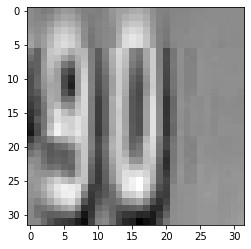

Label:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [72]:
plt.imshow(X_val[1654],cmap='gray')    
plt.show()
print('Label: ', y_val[1654])

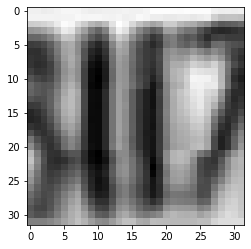

Label:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [73]:
plt.imshow(X_val[4345],cmap='gray')    
plt.show()
print('Label: ', y_val[4345])

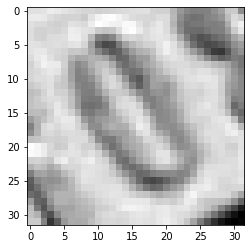

Label:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [74]:
plt.imshow(X_val[10],cmap='gray')    
plt.show()
print('Label: ', y_val[10])

### The label is represented as an one hot vector of all the categories present. 
### If the first elements value is 1 and rest 0 it means the number in the image is 0 .
###  If the second elements value is 1 and rest 0 it means the number in the image is 1 and so on .

## Our model correctly recognizes all the numbers in the respective images..